In [25]:
# header files
%matplotlib inline
import glob
import csv
import numpy as np
import pandas as pd
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [100, 100]
print("Header files loaded!")

Header files loaded!


In [2]:
# hyper-parameters
is_ovarian_cancer = 1
is_cervix_cancer = 0
is_endometrial_cancer = 0

In [3]:
# load ovarian cancer files
if is_ovarian_cancer:
    oc_files = (glob.glob("../results/oc_collagen_features/window_1/*"))
    print(len(oc_files))

95


In [4]:
# collect features
if is_ovarian_cancer:
    collagen_features = []
    for file in oc_files:
        filename = file.split("/")[-1]
        flag = -1
        file_features = []
        with open(file, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_2/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_3/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_4/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_5/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_6/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_7/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_8/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_9/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
        collagen_features.append(file_features)

In [5]:
# create output survival information for training model and get til features
if is_ovarian_cancer:
    til_features = []
    censor = []
    days = []
    filenames = []
    flag = -1
    with open("../results/DATA_OC.csv", newline='', encoding = "ISO-8859-1") as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                flag = 1
                print(row)
            else:
                array = row
                filenames.append(array[0])
                f_features = [float(array[1]), float(array[2]), float(array[3]), float(array[4]), float(array[5]), float(array[6]), float(array[7])]
                til_features.append(f_features)
                censor.append(bool(int(array[20])))
                days.append(int(array[23]))
                
    final_til_features = []
    y = []
    event = []
    survival_time = []
    for file in oc_files:
        count = 0
        filename1 = file.split("/")[-1][:-4]
        for filename in filenames:
            filename2 = filename
            if filename1 == filename2:
                final_til_features.append(til_features[count])
                y.append([censor[count], days[count]])
                event.append(censor[count])
                survival_time.append(days[count])
            count += 1
    print(len(final_til_features))
    print(len(y))
    print(len(event))
    print(len(survival_time))

['patient_name', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7', 'cont_risk_score', 'binary_risk_score', 'WSI_Width', 'WSI_Height', 'year_of_birth', 'race', 'year_of_death', 'vital_status', 'Organ', 'treatment_type', 'Age', 'TTE', 'censor', 'Site', 'stage', 'OS_days', 'Vital', 'stage_numeric']
95
95
95
95


In [6]:
# generate training set for training model
features = []
for index in range(0, len(oc_files)):
    features.append(final_til_features[index]+collagen_features[index])
    #features.append(collagen_features[index])
    #features.append(final_til_features[index])
print(len(features))
print(len(features[0]))

95
34


In [7]:
# final training information to be used for training model
features = np.array(features)
y = np.array(y)
event = np.array(event)
survival_time = np.array(survival_time)

In [ ]:
# main code for training
iter_scores = []
max_score = -1
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
for iter in range(100):
    model_score = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(features):
        # get the training and validation data
        features_train, features_test = features[train_index], features[test_index]
        y_train, y_test = y[train_index], y[test_index]
        event_train, survival_time_train = event[train_index], survival_time[train_index]
        event_test, survival_time_test = event[test_index], survival_time[test_index]
        y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        y_test = np.array([tuple(row) for row in y_test], dtype=dt)
        
        # feature selection
        scaler = MinMaxScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)
        select = SelectKBest(score_func=chi2, k=len(features[0])-4)
        features_train_selected = select.fit_transform(features_train, survival_time_train)
        features_test_selected = select.transform(features_test)
        features_train_df = pd.DataFrame(features_train_selected)
        features_test_df = pd.DataFrame(features_test_selected)
        
        # fit model
        estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
        estimator.fit(features_train_df, y_train)
        
        # score on validation set
        score, _, _, _, _ = concordance_index_censored(event_test, survival_time_test, estimator.predict(features_test_df))
        model_score.append(score)
        if score > max_score:
            max_score = score
    
    if len(model_score) > 0:
        iter_scores.append(np.mean(model_score))
        max_score = max(max(model_score), max_score)
print(np.mean(iter_scores), np.std(iter_scores))
print(max_score)

In [ ]:
# model to be used for external validation
features_train = features
y_train = y
event_train, survival_time_train = event, survival_time
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        
# feature selection
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
select = SelectKBest(score_func=chi2, k=len(features[0])-4)
features_train_selected = select.fit_transform(features_train, survival_time_train)
features_train_df = pd.DataFrame(features_train_selected)
        
# fit model
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
estimator.fit(features_train_df, y_train)

In [ ]:
# find prognostic features from model trained above
count = 0
for index1 in range(0, len(estimator.coef_)):
    flag = -1
    for index2 in range(0, len(estimator.coef_[index1])):
        if estimator.coef_[index1][index2] > 0:
            flag = 1
            print(index1)
            break
    if flag == 1:
        count += 1
print()
print("Prognostic features count = " + str(count))

In [27]:
# work with test data
test_oc_files = (glob.glob("../results/oc_collagen_features/test_window_1/*"))
print(len(test_oc_files))

125


In [28]:
# collect test features
is_ovarian_cancer = 1
if is_ovarian_cancer:
    test_collagen_features = []
    for file in test_oc_files:
        filename = file.split("/")[-1]
        flag = -1
        file_features = []
        with open(file, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_2/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_3/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_4/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_5/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_6/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_7/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_8/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_9/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
        test_collagen_features.append(file_features)

In [29]:
test_til_features = []
test_filenames = []
flag = -1
with open("../results/DATA_UPMC.csv", newline='', encoding = "ISO-8859-1") as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if flag == -1:
            flag = 1
            print(row)
        else:
            array = row
            test_filenames.append(array[0])
            f_features = [float(array[1]), float(array[2]), float(array[3]), float(array[4]), float(array[5]), float(array[6]), float(array[7])]
            test_til_features.append(f_features)

final_test_til_features = []
for file in test_oc_files:
    count = 0
    filename1 = file.split("/")[-1][:-7]
    for filename in test_filenames:
        filename2 = filename
        if filename1 == filename2:
            final_test_til_features.append(test_til_features[count])
        count += 1
print(len(final_test_til_features))

['patient_name', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7']
125


In [30]:
# generate training set for testing model
test_features = []
for index in range(0, len(test_oc_files)):
    test_features.append(final_test_til_features[index] + test_collagen_features[index])
    #test_features.append(test_collagen_features[index])
    #test_features.append(final_test_til_features[index])
print(len(test_features))
print(len(test_features[0]))

125
34


In [ ]:
# run on test set
features_train = features
features_test = test_features
y_train = y
event_train, survival_time_train = event, survival_time
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
y_train = np.array([tuple(row) for row in y_train], dtype=dt)
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
select = SelectKBest(score_func=chi2, k=len(features[0])-4)
features_train_selected = select.fit_transform(features_train, survival_time_train)
features_test_selected = select.transform(features_test)
features_train_df = pd.DataFrame(features_train_selected)
features_test_df = pd.DataFrame(features_test_selected)
        
# fit model
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
estimator.fit(features_train_df, y_train)

# get risk scores
train_risk_scores = estimator.predict(features_train_df)
test_risk_scores = estimator.predict(features_test_df)

median = np.median(train_risk_scores)
count_low = 0
count_high = 0
for index in range(0, len(test_risk_scores)):
    if test_risk_scores[index] > median:
        count_high += 1
    else:
        count_low += 1
print(count_low)
print(count_high)

In [ ]:
print(count_high)
for index in range(0, len(test_oc_files)):
    if test_risk_scores[index] > median:
        print(test_oc_files[index])

row_1 = []
row_2 = []
row_3 = []
row_4 = []
for index in range(0, len(test_oc_files)):
    filename = test_oc_files[index].split("/")[-1][:-8]
    flag = 0
    flag_category = "low"
    if test_risk_scores[index] > median:
        flag = 1
        flag_category = "high"
    row_1.append(str(filename))
    row_2.append(str(test_risk_scores[index]))
    row_3.append(str(flag))
    row_4.append(str(flag_category))
    
with open("../results/upmc_oc_collagen.csv", 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Patient Id", "Risk Score", "Risk (Numerical)", "Risk (Category)"])
    for index in range(0, len(test_oc_files)):    
        spamwriter.writerow([row_1[index], row_2[index], row_3[index], row_4[index]])

files = glob.glob("../results/upmc_oc_collagen_features/*")
print(len(files))

count_high = 0
count_low = 0
for file in files:
    flag = -1
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                flag = 1
            else:
                array = row
                if int(array[1]) == 0:
                    count_low += 1
                else:
                    count_high += 1
print(count_low)
print(count_high)

In [36]:
f = []
for feature in features:
    f.append(feature)
for test_feature in test_features:
    f.append(test_feature)
print(len(f))

220


In [37]:
features_train_df = pd.DataFrame(f)

In [38]:
features_train_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.533513,0.333949,-1.086828,1.405918,0.978678,-1.540692,0.459973,2.0773,0.63186,2.2962,...,2.2845,2.1575,0.92646,2.2858,2.1558,0.65040,2.2821,2.1659,1.05460,2.2864
1,-1.910191,0.484179,-0.932447,1.580441,1.883669,-1.010881,-0.893351,2.0508,0.55499,2.2928,...,2.2907,2.1383,0.67722,2.2916,2.1552,0.83054,2.2904,2.1534,0.69140,2.2876
2,0.238930,0.139697,0.112059,0.817554,-0.370815,0.238051,0.609878,2.0563,0.26814,2.2958,...,2.2871,2.1347,0.48321,2.2959,2.1406,0.48321,2.2889,2.1450,0.60763,2.2881
3,-2.750038,0.774055,-0.903915,3.709209,-0.289951,-0.907218,0.782801,1.9666,0.16892,2.2959,...,2.2917,2.1026,0.67690,2.2900,2.1130,0.84743,2.2934,2.1189,0.67407,2.2866
4,-2.155186,0.030064,-0.497603,3.443428,0.007541,-1.153257,-1.064715,2.0799,0.19244,2.2968,...,2.2889,2.1807,0.59202,2.2861,2.1849,0.98698,2.2868,2.1888,0.98044,2.2891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.574017,-0.606774,-0.607952,-0.037697,0.603953,-0.879543,-0.827883,2.1045,0.21272,2.2938,...,2.2923,2.1636,0.41048,2.2901,2.1692,0.47696,2.2820,2.1758,0.80114,2.2868
216,-1.785865,0.340958,-0.017925,0.989609,0.100651,-0.938631,-0.806389,2.0440,0.40681,2.2946,...,2.2915,2.1483,0.57987,2.2933,2.1537,0.68739,2.2944,2.1618,0.66346,2.2911
217,-0.759467,0.295497,0.392302,-0.520635,-1.997991,-0.818218,-0.875446,2.0368,0.47083,2.2942,...,2.2986,2.1234,0.59243,2.2854,2.1314,0.67005,2.2898,2.1330,0.85363,2.2856
218,0.242526,-0.180675,-0.742437,-0.931780,-0.805806,0.370921,0.748610,2.1587,0.65887,2.2940,...,2.2908,2.2193,1.23930,2.2865,2.2186,1.06540,2.2845,2.2261,0.68876,2.2834


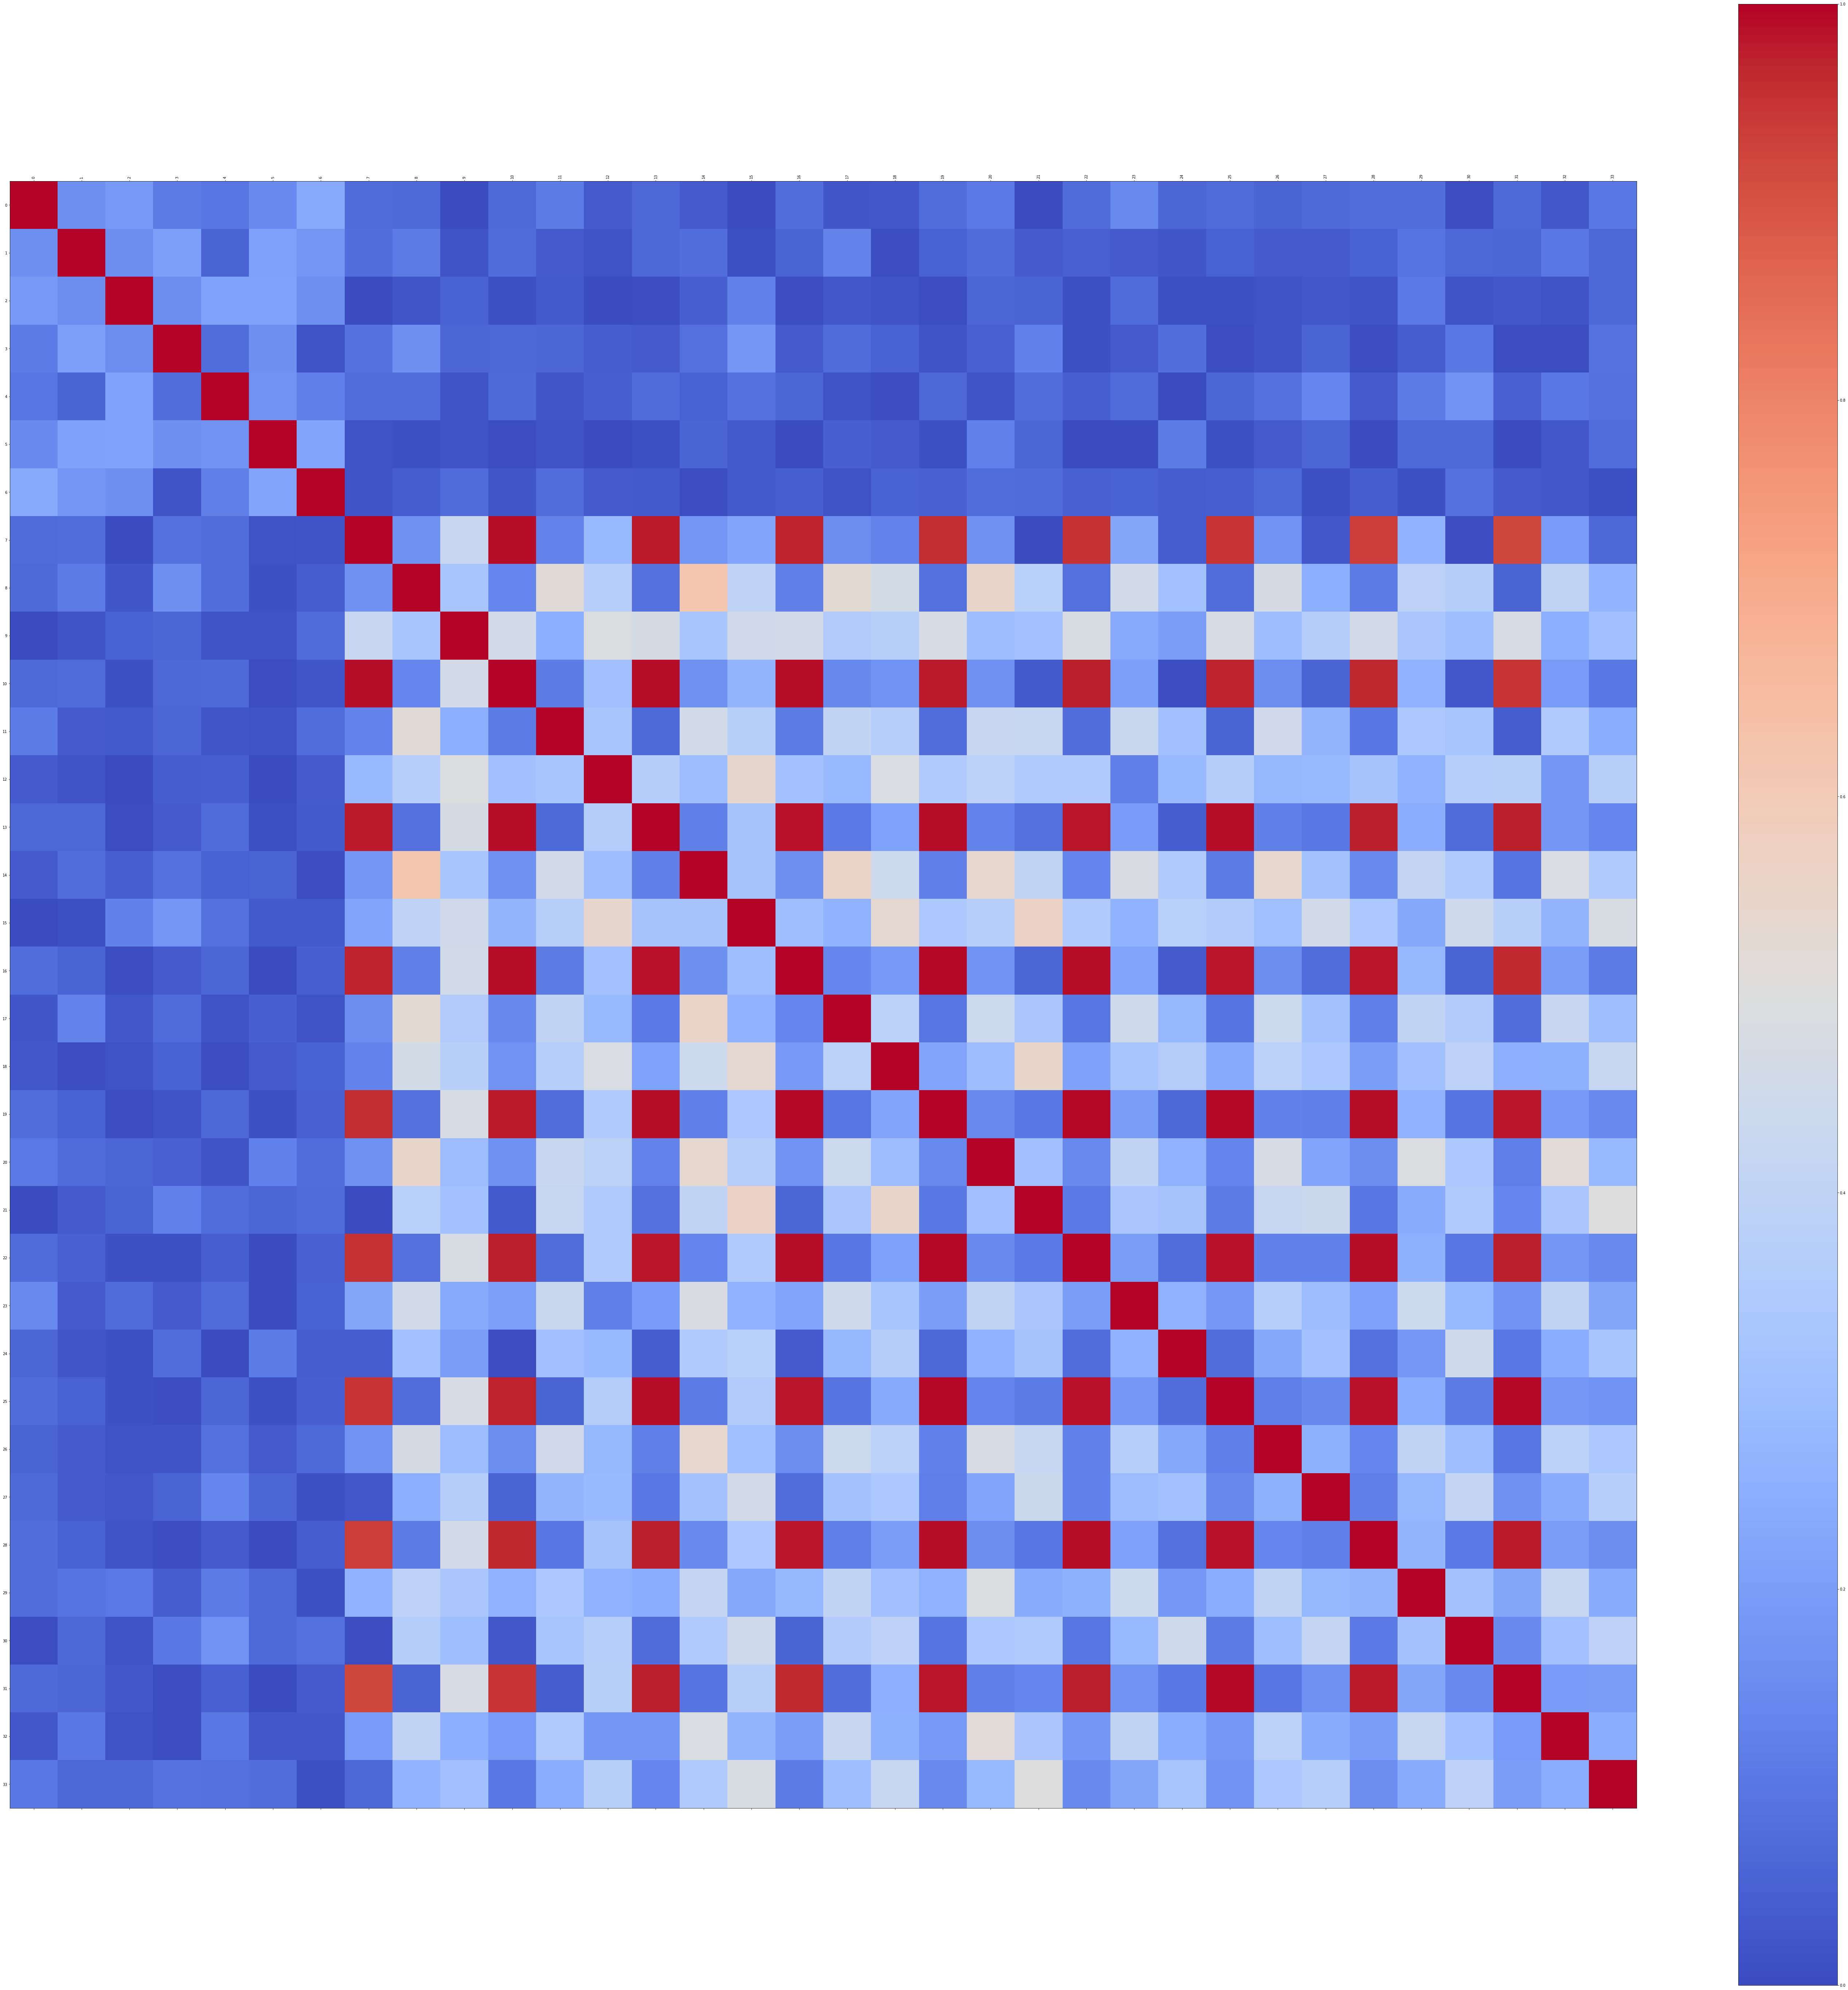

In [39]:
corr = features_train_df.corr().abs()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(features_train_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(features_train_df.columns)
ax.set_yticklabels(features_train_df.columns)
plt.show()

In [40]:
corr

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.000000,0.162541,0.189528,0.109789,0.097710,0.149934,0.237067,0.072280,0.067482,0.002745,...,0.059315,0.071022,0.055750,0.069581,0.080651,0.080682,0.004395,0.068068,0.029520,0.103437
1,0.162541,1.000000,0.157313,0.205438,0.057718,0.207729,0.177913,0.080587,0.112747,0.020932,...,0.024705,0.050823,0.036324,0.036026,0.053624,0.094818,0.066196,0.062160,0.105419,0.063616
2,0.189528,0.157313,1.000000,0.155949,0.213459,0.212780,0.160766,0.002231,0.025349,0.051693,...,0.007991,0.013886,0.016908,0.028445,0.019189,0.108328,0.019311,0.027740,0.018233,0.064594
3,0.109789,0.205438,0.155949,1.000000,0.080574,0.160491,0.017936,0.089350,0.162855,0.061030,...,0.078829,0.004487,0.022668,0.055025,0.006546,0.040923,0.102909,0.004619,0.004516,0.091397
4,0.097710,0.057718,0.213459,0.080574,1.000000,0.171628,0.122557,0.077529,0.079585,0.016779,...,0.001274,0.060489,0.086805,0.139835,0.038396,0.110486,0.169998,0.050204,0.102968,0.088027
5,0.149934,0.207729,0.212780,0.160491,0.171628,1.000000,0.221294,0.018583,0.013182,0.018988,...,0.114948,0.012798,0.036343,0.060639,0.002672,0.069439,0.066691,0.003721,0.030931,0.080302
6,0.237067,0.177913,0.160766,0.017936,0.122557,0.221294,1.000000,0.021823,0.041460,0.071097,...,0.040542,0.044935,0.068074,0.013731,0.040624,0.012785,0.082597,0.035316,0.028818,0.013279
7,0.072280,0.080587,0.002231,0.089350,0.077529,0.018583,0.021823,1.000000,0.167555,0.426017,...,0.040501,0.946100,0.169972,0.027736,0.936606,0.265025,0.007193,0.919858,0.193034,0.065591
8,0.067482,0.112747,0.025349,0.162855,0.079585,0.013182,0.041460,0.167555,1.000000,0.324449,...,0.315167,0.074444,0.469361,0.249286,0.110994,0.392163,0.363442,0.057653,0.400294,0.266191
9,0.002745,0.020932,0.051693,0.061030,0.016779,0.018988,0.071097,0.426017,0.324449,1.000000,...,0.198105,0.476479,0.297007,0.364293,0.461992,0.333482,0.304479,0.474947,0.248692,0.309840


In [16]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
new_data = features_train_df.drop(features_train_df[to_drop], axis=1)

<ipython-input-16-255c6ae6d4ed>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [17]:
print(features_train_df.shape)
new_data.shape

(95, 34)


(95, 26)